Electric Vehicle Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
ev_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Electric_Vehicle_Population_Data.csv")

In [ ]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
# Preview the dataset
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194232 entries, 0 to 194231
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         194232 non-null  object 
 1   County                                             194223 non-null  object 
 2   City                                               194223 non-null  object 
 3   State                                              194232 non-null  object 
 4   Postal Code                                        194223 non-null  float64
 5   Model Year                                         194232 non-null  int64  
 6   Make                                               194232 non-null  object 
 7   Model                                              194232 non-null  object 
 8   Electric Vehicle Type                              194232 non-null  object

In [ ]:
ev_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,194223.000000,194232.000000,194230.000000,194230.000000,193800.000000,1.942320e+05,1.942230e+05
mean,98175.800678,2020.781807,54.835458,978.730732,29.009954,2.248923e+08,5.297532e+10
std,2435.345863,2.999041,89.614355,7988.719011,14.901335,7.357830e+07,1.607770e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.872251e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.339402e+08,5.303303e+10
75%,98372.000000,2023.000000,68.000000,0.000000,42.000000,2.601159e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [62]:
# Checking the percentage of missing values in each column
missing_values = ev_data.isnull().mean() * 100

# Handle missing values
# Fill numerical missing values with mean or median depending on the distribution
ev_data['Electric Range'].fillna(ev_data['Electric Range'].median(), inplace=True)
ev_data['Base MSRP'].fillna(ev_data['Base MSRP'].median(), inplace=True)

# Fill categorical missing values with the mode
categorical_cols = ['County', 'City', 'Postal Code', 'Legislative District', 'Vehicle Location', 'Electric Utility']
for col in categorical_cols:
    ev_data[col].fillna(ev_data[col].mode()[0], inplace=True)

# Rechecking for missing values
missing_values_after = ev_data.isnull().mean() * 100

missing_values, missing_values_after

<ipython-input-62-25d644ae4558>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data[col].fillna(ev_data[col].mode()[0], inplace=True)


(VIN (1-10)                                           0.000000
 County                                               0.000000
 City                                                 0.000000
 State                                                0.000000
 Postal Code                                          0.000000
 Model Year                                           0.000000
 Make                                                 0.000000
 Model                                                0.000000
 Electric Vehicle Type                                0.000000
 Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
 Electric Range                                       0.000000
 Base MSRP                                            0.000000
 Legislative District                                 0.000000
 DOL Vehicle ID                                       0.000000
 Vehicle Location                                     0.000000
 Electric Utility                                     0

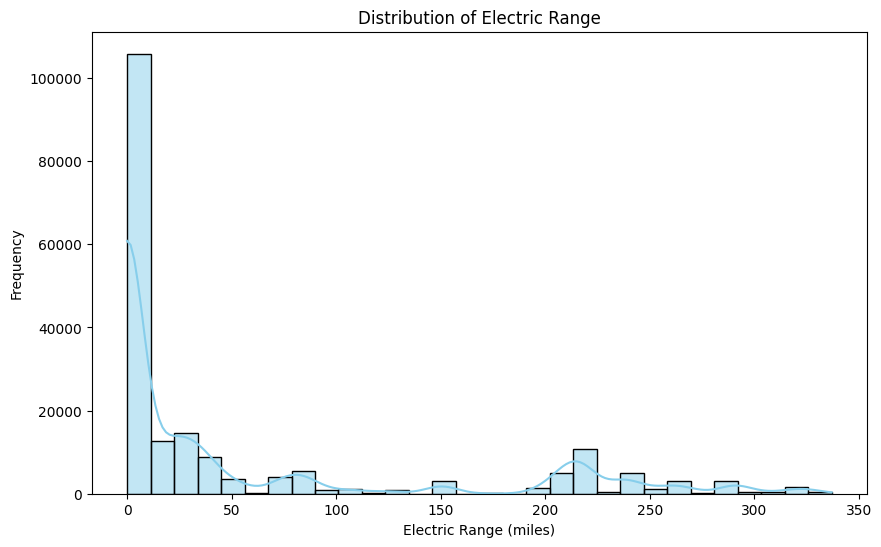

In [ ]:
# Univariate Analysis: Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(ev_data['Electric Range'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-52-8df43d5330d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')


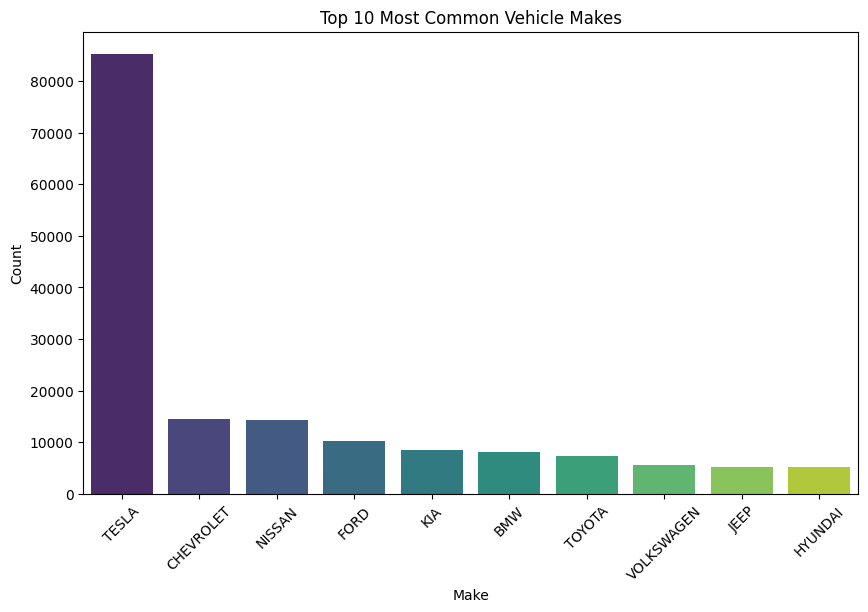

In [ ]:
# Univariate Analysis: Top 10 most common vehicle makes
plt.figure(figsize=(10, 6))
top_makes = ev_data['Make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Most Common Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

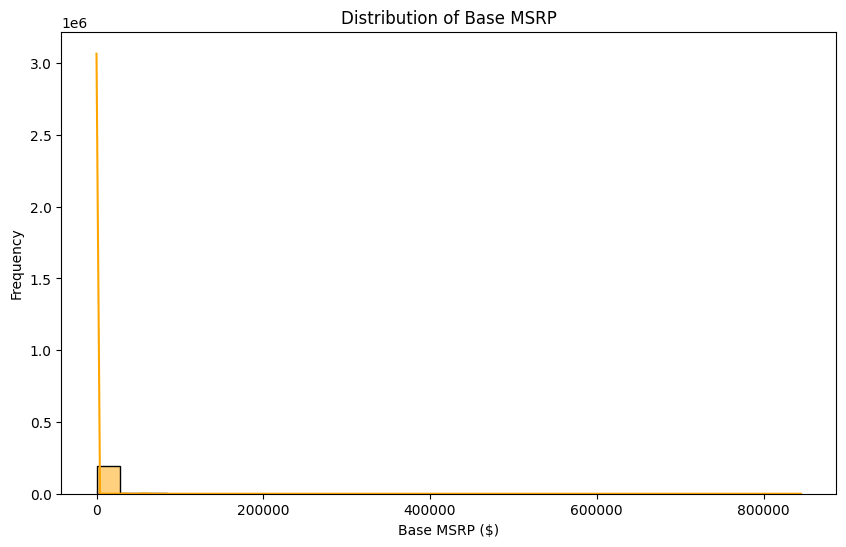

In [ ]:
# Univariate Analysis: Distribution of Base MSRP
plt.figure(figsize=(10, 6))
sns.histplot(ev_data['Base MSRP'], kde=True, bins=30, color='orange')
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.show()

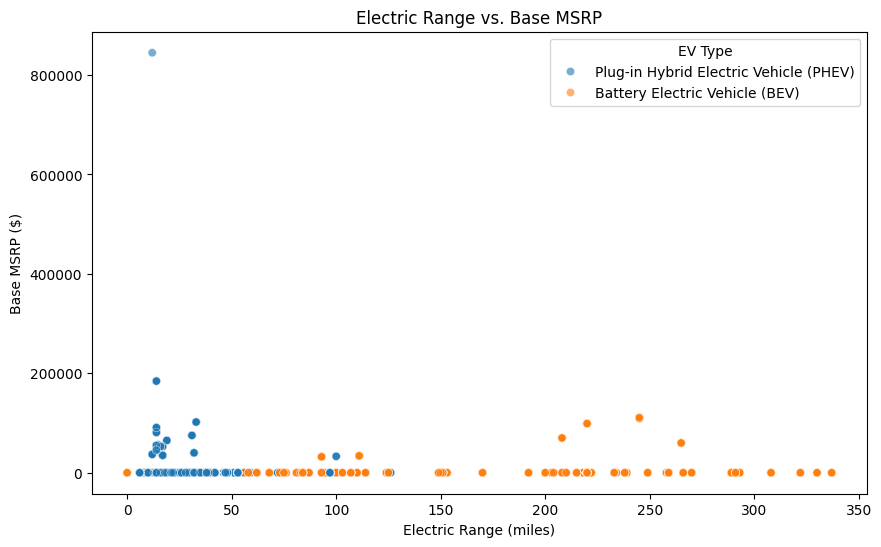

In [ ]:
# Bivariate Analysis: Electric Range vs. Base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type', data=ev_data, alpha=0.6)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='EV Type', loc='upper right')
plt.show()

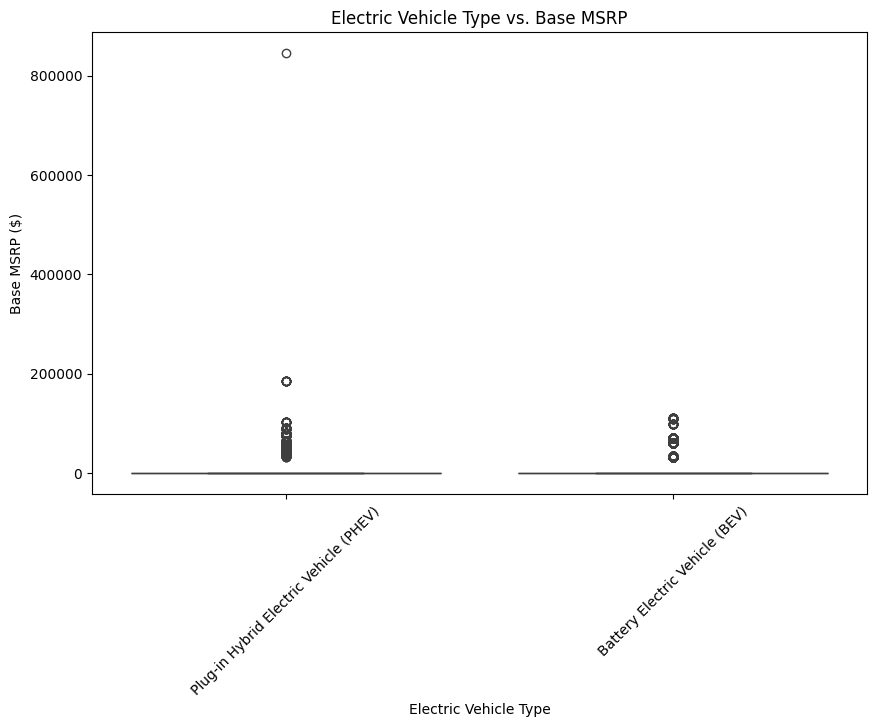

In [ ]:
# Bivariate Analysis: Electric Vehicle Type vs. Base MSRP
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=ev_data)
plt.title('Electric Vehicle Type vs. Base MSRP')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP ($)')
plt.xticks(rotation=45)
plt.show()

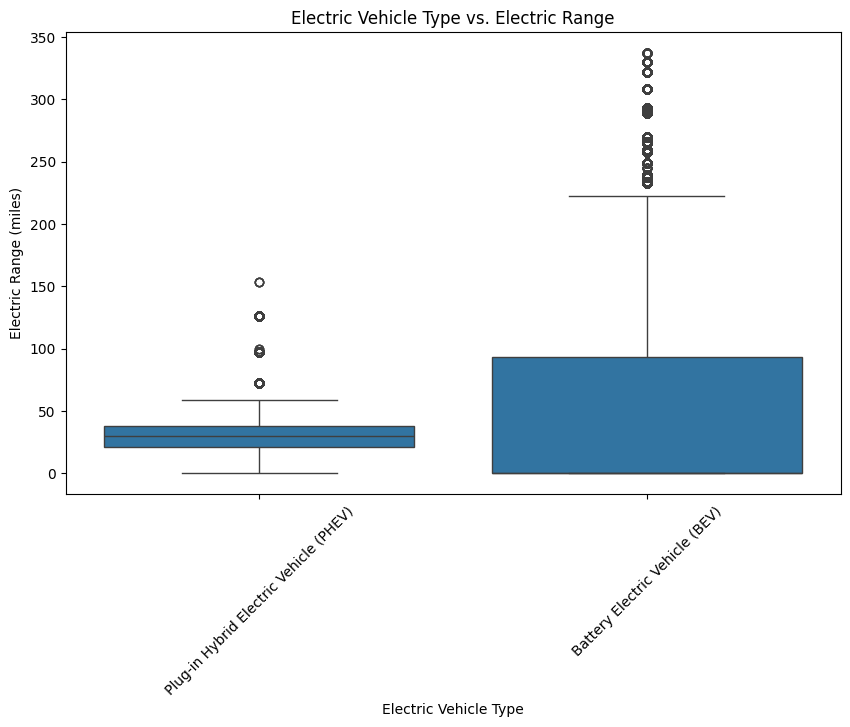

In [ ]:
# Bivariate Analysis:  Electric Vehicle Type vs. Electric Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=ev_data)
plt.title('Electric Vehicle Type vs. Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

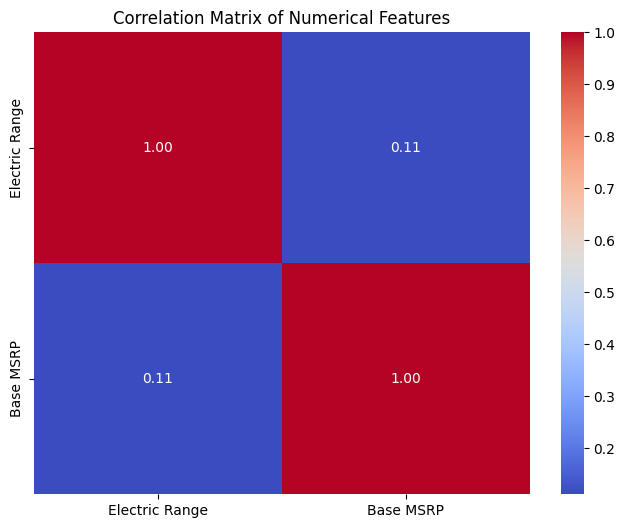

In [ ]:
# Bivariate Analysis: Correlation Matrix (Heatmap)
# Select numerical columns for correlation analysis
numerical_cols = ['Electric Range', 'Base MSRP']
correlation_matrix = ev_data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

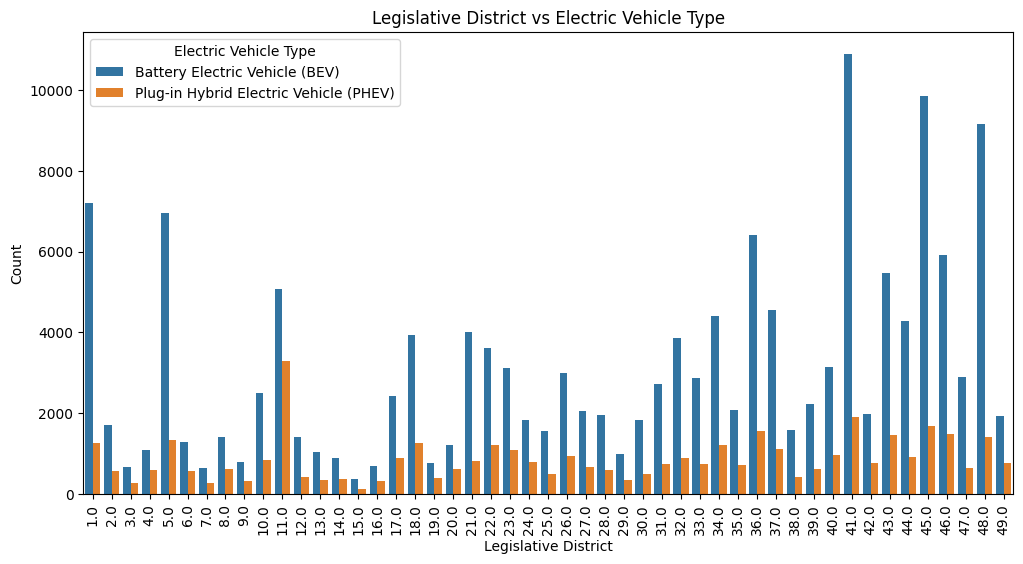

In [ ]:
#Bivariate Analysis: Relation between Legislative District and Electric Vehicle Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Legislative District', hue='Electric Vehicle Type', data=ev_data)
plt.title('Legislative District vs Electric Vehicle Type')
plt.xlabel('Legislative District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

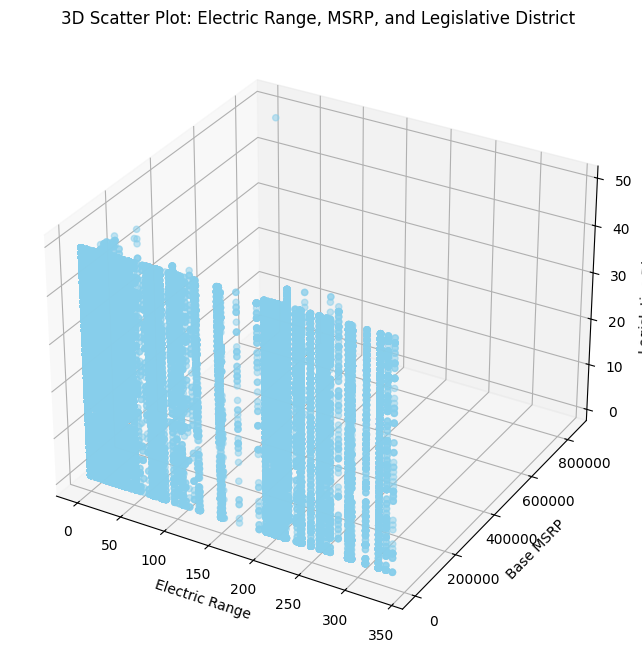

In [ ]:
# Example 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming you have relevant data in your DataFrame (replace with your actual column names)
x = ev_data['Electric Range']
y = ev_data['Base MSRP']
z = ev_data['Legislative District']


ax.scatter(x, y, z, c='skyblue', marker='o', alpha=0.5)
ax.set_xlabel('Electric Range')
ax.set_ylabel('Base MSRP')
ax.set_zlabel('Legislative District')
ax.set_title('3D Scatter Plot: Electric Range, MSRP, and Legislative District')
plt.show()


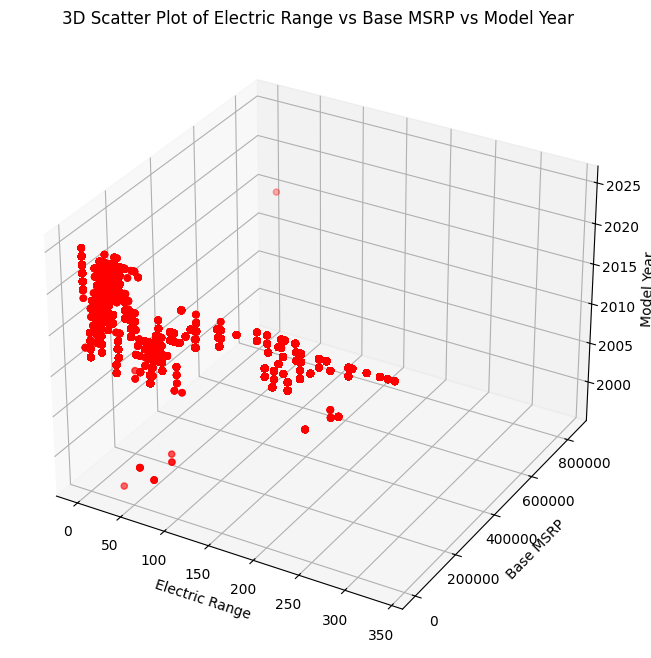

In [ ]:
# 3D Scatter plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter based on vehicle type
ax.scatter(ev_data['Electric Range'], ev_data['Base MSRP'], ev_data['Model Year'], c='r', marker='o')

# Add labels
ax.set_xlabel('Electric Range')
ax.set_ylabel('Base MSRP')
ax.set_zlabel('Model Year')
plt.title('3D Scatter Plot of Electric Range vs Base MSRP vs Model Year')
plt.show()